# "Assignment - 02"

## "Transport In Ireland (Comparison Between Ireland Transport Data V/S Switzerland Transport Data)"

### First Import Liberaries & Clean Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Ireland dataset
ireland_data = pd.read_csv('C:/Users/Ycomputer/Downloads/CA02 - MSc Data Analytics/ireland.csv')

# Load Switzerland dataset
switzerland_data = pd.read_csv('C:/Users/Ycomputer/Downloads/CA02 - MSc Data Analytics/switzerland dataset.csv')

# Data cleaning for Ireland dataset (modify as needed)
ireland_data_cleaned = ireland_data.dropna()  # Drop rows with missing values

# Data cleaning for Switzerland dataset (modify as needed)
switzerland_data_cleaned = switzerland_data.drop_duplicates()  # Remove duplicate rows

# Save cleaned datasets to the same file
ireland_data_cleaned.to_csv('C:/Users/Ycomputer/Downloads/CA02 - MSc Data Analytics/cleaned_ireland.csv', index=False)
switzerland_data_cleaned.to_csv('C:/Users/Ycomputer/Downloads/CA02 - MSc Data Analytics/cleaned_switzerland.csv', index=False)

In [3]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

### Data Pre-processing & Exploratory Data Analysis (EDA)

In [4]:
ireland_data.head(10)

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,23838.0
1,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,38353.0
2,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,39973.0
3,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,40314.0
4,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,40709.0
5,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,6,Week 06,Number,40682.0
6,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,7,Week 07,Number,41778.0
7,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,8,Week 08,Number,41783.0
8,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,9,Week 09,Number,42588.0
9,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,10,Week 10,Number,42979.0


Now Importing the required libraries for EDA (Exploratory Data Analysis). This step is very important especially when we arrive at modelling the data to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plots and many more. Through the process of EDA, we can also refine the problem statement or definition of our problem.

In [5]:
ireland_data.tail(10)

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
520,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,44,Week 44,Number,NaN
521,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,45,Week 45,Number,NaN
522,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,46,Week 46,Number,NaN
523,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,47,Week 47,Number,NaN
524,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,48,Week 48,Number,NaN
525,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,49,Week 49,Number,NaN
526,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,50,Week 50,Number,NaN
527,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,51,Week 51,Number,NaN
528,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,52,Week 52,Number,NaN
529,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,53,Week 53,Number,NaN


In [6]:
switzerland_data.head(10)

,halt_id,halt_diva,halt_kurz,halt_lang,halt_ist_aktiv
0,143,2570,BirmSte,"Birmensdorf ZH, Sternen/WSL",True
1,309,3356,WalBiSt,"Waldegg, Birmensdorferstrasse",True
2,373,6232,FRAF07,"Zürich Flughafen, Fracht",True
3,588,3027,FLUG07,"Zürich Flughafen, Bahnhof",True
4,623,2989,TZEN01,"Thalwil, Zentrum",True
5,701,1012,GOLP,"Zürich, Goldbrunnenplatz",True
6,729,687,UitiDrf,"Uitikon, Dorf",True
7,751,2758,UNTR07,"Glattbrugg, Unterriet",True
8,809,501,BirmBhf,"Birmensdorf ZH, Bahnhof",True
9,832,1401,KILB,"Kilchberg ZH, Kirche",True


In [7]:
switzerland_data.tail(10)

,halt_id,halt_diva,halt_kurz,halt_lang,halt_ist_aktiv
705,3044,6894,DHEI,"Dietikon, Heimstrasse",True
706,3049,6779,BBAU,"Binz bei Maur, Bautacher",True
707,3050,6778,BLAN,"Benglen, Langwis",True
708,3055,6907,WaldLeu,"Waldegg, Leuen",True
709,3086,6856,TSON01,"Thalwil, Sonnenberg",True
710,3102,9984,ABS6,"Zürich, Abstellplatz Garage 6",True
711,3104,9983,WEZW,"Zürich, Wenden Zentralwerkstät",True
712,3135,6961,AGRU,"Adliswil, Grundstrasse",True
713,3158,6975,GLNO,"Zürich, Glaubtenstrasse Nord",True
714,3176,6986,DHOS07,"Dübendorf, Hochbord Süd",True


In [8]:
ireland_data.shape

(530, 10)

In [9]:
switzerland_data.shape

(715, 5)

In [10]:
ireland_data.dtypes

STATISTIC                  object
Statistic Label            object
TLIST(W1)                   int64
Year                        int64
C03910V04662                int64
Transport Traffic Site     object
C01198V01436                int64
Weeks of the year          object
UNIT                       object
VALUE                     float64
dtype: object

In [11]:
switzerland_data.dtypes

halt_id            int64
halt_diva          int64
halt_kurz         object
halt_lang         object
halt_ist_aktiv      bool
dtype: object

In [12]:
ireland_data.count

<bound method DataFrame.count of     STATISTIC                                Statistic Label  TLIST(W1)  Year  \
0    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
1    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
2    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
3    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
4    THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
..        ...                                            ...        ...   ...   
525  THA22C01  Average weekly volume of heavy goods vehicles       2023  2023   
526  THA22C01  Average weekly volume of heavy goods vehicles       2023  2023   
527  THA22C01  Average weekly volume of heavy goods vehicles       2023  2023   
528  THA22C01  Average weekly volume of heavy goods vehicles       2023  2023   
529  THA22C01  Average weekly volume of heavy goods vehicles       2023  202

In [13]:
switzerland_data.count

<bound method DataFrame.count of      halt_id  halt_diva halt_kurz                       halt_lang  \
0        143       2570   BirmSte     Birmensdorf ZH, Sternen/WSL   
1        309       3356   WalBiSt   Waldegg, Birmensdorferstrasse   
2        373       6232    FRAF07        Zürich Flughafen, Fracht   
3        588       3027    FLUG07       Zürich Flughafen, Bahnhof   
4        623       2989    TZEN01                Thalwil, Zentrum   
..       ...        ...       ...                             ...   
710     3102       9984      ABS6   Zürich, Abstellplatz Garage 6   
711     3104       9983      WEZW  Zürich, Wenden Zentralwerkstät   
712     3135       6961      AGRU          Adliswil, Grundstrasse   
713     3158       6975      GLNO    Zürich, Glaubtenstrasse Nord   
714     3176       6986    DHOS07         Dübendorf, Hochbord Süd   

     halt_ist_aktiv  
0              True  
1              True  
2              True  
3              True  
4              True  
..    

In [14]:
ireland_data.isna().sum()

STATISTIC                  0
Statistic Label            0
TLIST(W1)                  0
Year                       0
C03910V04662               0
Transport Traffic Site     0
C01198V01436               0
Weeks of the year          0
UNIT                       0
VALUE                     34
dtype: int64

After Cleanig Ireland Transport Data the data there was no Null Value. As you see below

In [15]:
ireland_data_cleaned.isna().sum()

STATISTIC                 0
Statistic Label           0
TLIST(W1)                 0
Year                      0
C03910V04662              0
Transport Traffic Site    0
C01198V01436              0
Weeks of the year         0
UNIT                      0
VALUE                     0
dtype: int64

Since our Ireland Trandsport Data has been Cleaned now, we may proceed to the analysis stage.

In [16]:
switzerland_data.isna().sum()

halt_id           0
halt_diva         0
halt_kurz         0
halt_lang         0
halt_ist_aktiv    0
dtype: int64

In [17]:
switzerland_data_cleaned.isna().sum()

halt_id           0
halt_diva         0
halt_kurz         0
halt_lang         0
halt_ist_aktiv    0
dtype: int64

After Cleanig Switzerland Transport Data the data there was no Null Value.Since our data has been Cleaned now, we may proceed to the analysis stage. 

#### Now, we further doing Data Visualization on our datasets in the following code.

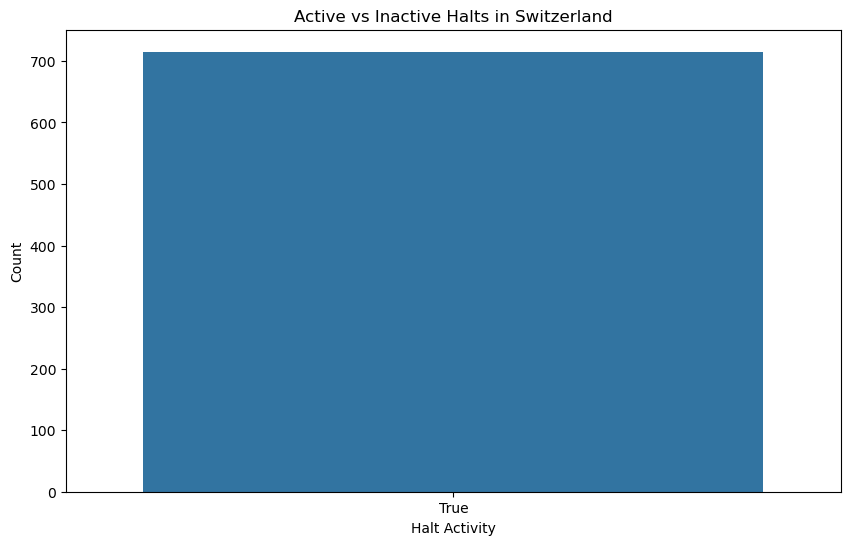

In [18]:
switzerland_cleaned_path = r'C:/Users/Ycomputer/Downloads/SAA-1009/Datasets/cleaned_switzerland.csv'

switzerland_data = pd.read_csv(switzerland_cleaned_path)

# Visualize Switzerland dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='halt_ist_aktiv', data=switzerland_data)
plt.title('Active vs Inactive Halts in Switzerland')
plt.xlabel('Halt Activity')
plt.ylabel('Count')
plt.show()

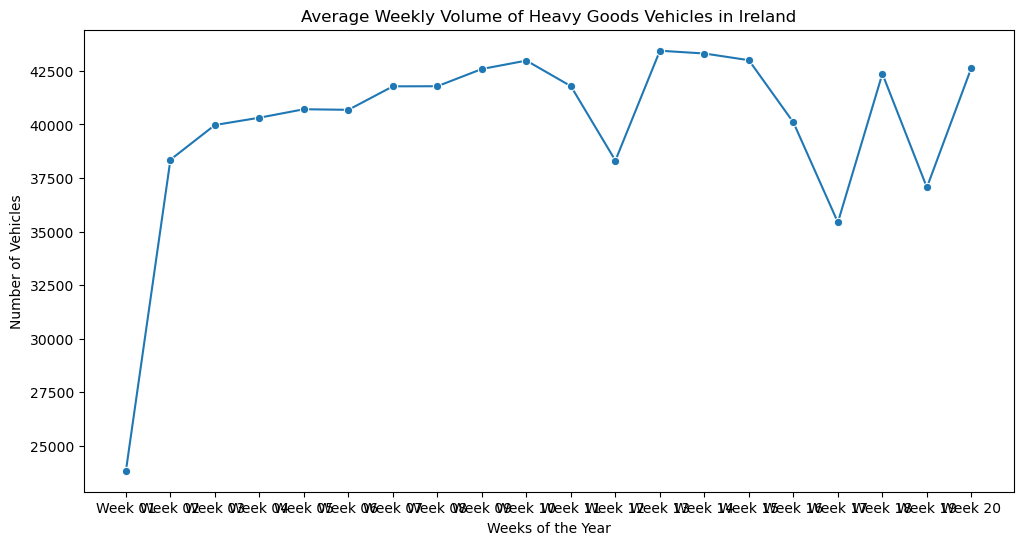

In [19]:
switzerland_cleaned_path = r'C:/Users/Ycomputer/Downloads/SAA-1009/Datasets/cleaned_switzerland.csv'

switzerland_data = pd.read_csv(switzerland_cleaned_path)

ireland_data = pd.DataFrame({
    'Weeks of the year': ['Week 01', 'Week 02', 'Week 03', 'Week 04', 'Week 05', 'Week 06', 'Week 07', 'Week 08', 'Week 09', 'Week 10', 'Week 11', 'Week 12', 'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17', 'Week 18', 'Week 19', 'Week 20'],
    'Average Weekly Volume': [23838, 38353, 39973, 40314, 40709, 40682, 41778, 41783, 42588, 42979, 41785, 38313, 43440, 43310, 42998, 40096, 35429, 42366, 37060, 42644]
})


plt.figure(figsize=(12, 6))
sns.lineplot(x='Weeks of the year', y='Average Weekly Volume', data=ireland_data, marker='o')
plt.title('Average Weekly Volume of Heavy Goods Vehicles in Ireland')
plt.xlabel('Weeks of the Year')
plt.ylabel('Number of Vehicles')
plt.show()